# Running the multiVelocity pipeline all samples together

## Setting up the environment

In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import multivelo as mv
import matplotlib.pyplot as plt
import sys
import seaborn as sns

In [2]:
# Determine the folder in which the code is executed
WORKING_DIR = os.getcwd()
sys.path.append(os.path.abspath( WORKING_DIR))

# Run the params codes
%run -i ../../globalParams.py #GlobalParams
%run -i ../../sampleParams.py #sampleParams
%run -i ./analysisParams.py #AnalysisParams

In [3]:
# scvelo and panda parameters

scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

## Reading in unspilced and spliced counts

In [4]:
# Read the adata object
#adata = sc.read_h5ad("/mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/04_SCENICplus_Analysis/04b_Step2_Anndata_Prepro_scRNAseq/adata.h5ad") #Need to improve this
adata = sc.read_h5ad( os.path.join( PATH_EXPERIMENT_OUTPUT , ANALYSIS_04b_STEP_NAME , "adata.h5ad"))

## Update adata name
# Create a mapping dictionary called old_to_new_mapping from the old categories to the new categories => This is directly done in analysis params.

# Replace the old categories with the new ones
adata.obs[CELL_TYPE_COLNAME] = adata.obs[CELL_TYPE_COLNAME].map(old_to_new_mapping)
# Update the categories to reflect the new set
adata.obs[CELL_TYPE_COLNAME] = adata.obs[CELL_TYPE_COLNAME].astype('category')

###################
#Simplify the following code in a loop
# load dimensional reductions:
#RNA = pd.read_csv("/mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/04_SCENICplus_Analysis/04a0_Step0_R_Extract_Metadata/Embeddings/RNA_UMAP_TABLE.csv")
RNA = pd.read_csv(os.path.join( PATH_ANALYSIS_OUTPUT, "Embeddings/RNA_UMAP_TABLE.csv"), index_col = 0)
RNA.index = [f"{cell.split('_')[1]}_{cell.split('_')[0]}" for cell in RNA.index]
RNA = RNA.reindex(adata.obs.index)

ATAC = pd.read_csv(os.path.join( PATH_ANALYSIS_OUTPUT, "Embeddings/ATAC_UMAP_TABLE.csv"), index_col = 0)
ATAC.index = [f"{cell.split('_')[1]}_{cell.split('_')[0]}" for cell in ATAC.index]
ATAC = ATAC.reindex(adata.obs.index)

WNN = pd.read_csv(os.path.join( PATH_ANALYSIS_OUTPUT, "Embeddings/WNN_UMAP_TABLE.csv"), index_col = 0)
WNN.index = [f"{cell.split('_')[1]}_{cell.split('_')[0]}" for cell in WNN.index]
WNN = WNN.reindex(adata.obs.index)


# set them
adata.obsm['X_rna_umap'] = RNA.to_numpy()
adata.obsm['X_atac_umap'] = ATAC.to_numpy()
adata.obsm['X_wnn_umap'] = WNN.to_numpy()
###############################

#We subset to focus on NK3 populations
adata = adata[adata.obs[CELL_TYPE_COLNAME].isin(populations_of_interest)]


#Set the seed
np.random.seed(1234)

In [5]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
CATCCCAGTTCATTTG-1_CSS19     BS1308        1763          1032        14916   
TAGTTTGAGCCAGTAT-1_CSS16     BS1198        2650          1387        19775   
ATATGTCCACGTAAGG-1_CSS23     BS1319        2642          1207        20609   
TTGGGCCAGTCCTGAG-1_CSS4       BS824        1607          1083         6881   
CAGGAAGGTTAGAGCC-1_CSS21     BS1314        1929          1151        32429   
...                             ...         ...           ...          ...   
TTTCCACCATTGCGGT-1_CSS4       BS824        2088          1336         8260   
GCAGCAACATGCTCCC-1_CSS16     BS1198        3336          1632         1799   
ACCAAACTCCGTTAAA-1_CSS13     BS1175        7549          2191        16552   
AGCTAAACACGTAAGG-1_CSS4       BS824        1494          1054         8128   
TTAGCGGTCATCCACC-1_CSS4       BS824        1714          1173         4700   

                          nFeature_ATAC       cell_type     sex smoker sample  \
CATCCCAGTTCATTTG-1_CSS19           6566  Tumor_NK_cells  female     NS  CSS19   
TAGTTTGAGCCAGTAT-1_CSS16           7936  Tumor_NK_cells  female  30 py  CSS16   
ATATGTCCACGTAAGG-1_CSS23           8292  Tumor_NK_cells    male  50 py  CSS23   
TTGGGCCAGTCCTGAG-1_CSS4            3305  Tumor_NK_cells    male  12 py   CSS4   
CAGGAAGGTTAGAGCC-1_CSS21          12148  Tumor_NK_cells  female  25 py  CSS21   
...                                 ...             ...     ...    ...    ...   
TTTCCACCATTGCGGT-1_CSS4            3946  Tumor_NK_cells    male  12 py   CSS4   
GCAGCAACATGCTCCC-1_CSS16            905  Tumor_NK_cells  female  30 py  CSS16   
ACCAAACTCCGTTAAA-1_CSS13           6429  Tumor_NK_cells  female  14 py  CSS13   
AGCTAAACACGTAAGG-1_CSS4            3791  Tumor_NK_cells    male  12 py   CSS4   
TTAGCGGTCATCCACC-1_CSS4            2351  Tumor_NK_cells    male  12 py   CSS4   

                          nCount_peaks  nFeature_peaks  fragments      FRiP  \
CATCCCAGTTCATTTG-1_CSS19          8914            6935      11946  0.746191   
TAGTTTGAGCCAGTAT-1_CSS16         10989            8121      12899  0.851927   
ATATGTCCACGTAAGG-1_CSS23         12224            8479      14770  0.827624   
TTGGGCCAGTCCTGAG-1_CSS4           3951            3510       5131  0.770025   
CAGGAAGGTTAGAGCC-1_CSS21         19072           12391      24756  0.770399   
...                                ...             ...        ...       ...   
TTTCCACCATTGCGGT-1_CSS4           4784            4208       6190  0.772859   
GCAGCAACATGCTCCC-1_CSS16          1015             971       1143  0.888014   
ACCAAACTCCGTTAAA-1_CSS13          9585            6858      11825  0.810571   
AGCTAAACACGTAAGG-1_CSS4           4697            4063       6423  0.731278   
TTAGCGGTCATCCACC-1_CSS4           2760            2546       3835  0.719687   

                          blacklist_fraction  nucleosome_signal  \
CATCCCAGTTCATTTG-1_CSS19            0.006369           1.018433   
TAGTTTGAGCCAGTAT-1_CSS16            0.008647           0.526334   
ATATGTCCACGTAAGG-1_CSS23            0.008346           0.984102   
TTGGGCCAGTCCTGAG-1_CSS4             0.006540           0.811005   
CAGGAAGGTTAGAGCC-1_CSS21            0.008357           0.823773   
...                                      ...                ...   
TTTCCACCATTGCGGT-1_CSS4             0.007506           0.798077   
GCAGCAACATGCTCCC-1_CSS16            0.010006           0.529661   
ACCAAACTCCGTTAAA-1_CSS13            0.007673           0.699316   
AGCTAAACACGTAAGG-1_CSS4             0.008981           0.916245   
TTAGCGGTCATCCACC-1_CSS4             0.007021           0.856148   

                          nucleosome_percentile  TSS.enrichment  \
CATCCCAGTTCATTTG-1_CSS19                   0.32        5.035225   
TAGTTTGAGCCAGTAT-1_CSS16                   0.26        6.699070   
ATATGTCCACGTAAGG-1_CSS23                   0.54        4.997646   
TTGGGCCAGTCCTGAG-1_CSS4                    0.42        5.029935   
CAGGAAGGTTAGAGCC-1_CSS21  

In [6]:
import os
import scanpy as scv

# Get the list of sample names (folders in PATH_TO_VELOCITY_FOLDER)
sample_names = [f for f in os.listdir(PATH_TO_VELOCITY_FOLDER) if os.path.isdir(os.path.join(PATH_TO_VELOCITY_FOLDER, f))]

# Dictionary to store AnnData objects
adata_rna_dict = {}

# Process each sample
for sample in sample_names:
    folder_path = os.path.join(PATH_TO_VELOCITY_FOLDER, sample)
    
    # Find the .loom file in the folder
    loom_files = [f for f in os.listdir(folder_path) if f.endswith('.loom')]
    
    # Check if there is exactly one .loom file and read it
    if len(loom_files) == 1:
        loom_file_path = os.path.join(folder_path, loom_files[0])
        adata_rna = scv.read(loom_file_path, cache=True)
        print(f"Loaded {loom_files[0]} for sample {sample}")

        # Modify the observation names
        adata_rna.obs_names = [x.split(':')[1][:-1] + '-1_' + x.split(':')[0] for x in adata_rna.obs_names]
        
        # Ensure variable names are unique
        adata_rna.var_names_make_unique()
        
        # Store in dictionary
        adata_rna_dict[sample] = adata_rna
    else:
        print(f"Error: There should be exactly one .loom file in the folder for sample {sample}. Found: {len(loom_files)}")

# Now, adata_rna_dict contains all the processed AnnData objects indexed by sample name


Loaded CSS1_BS840.loom for sample CSS1
Loaded CSS23_BS1319.loom for sample CSS23
Loaded CSS4_BS824.loom for sample CSS4
Loaded CSS7_BS889.loom for sample CSS7
Loaded CSS25_BS1318.loom for sample CSS25
Loaded CSS27_BS1322.loom for sample CSS27
Loaded CSS21_BS1314.loom for sample CSS21
Loaded CSS19_BS1308.loom for sample CSS19
Loaded CSS13_BS1175.loom for sample CSS13
Loaded CSS16_BS1198.loom for sample CSS16
Loaded CSS10_BS897.loom for sample CSS10


In [7]:
import scanpy as sc

# Add a column indicating the sample name in each AnnData object
for sample, adata_loop in adata_rna_dict.items():
    adata_loop.obs['sample'] = sample  # Add sample name as metadata

# Merge all AnnData objects into a single one
adata_merged = sc.concat(list(adata_rna_dict.values()), label="sample", keys=list(adata_rna_dict.keys()))

# Extract the var slot (it's the same for all samples
var_to_add = adata_rna_dict["CSS13"].var

#Insert the slot
adata_merged.var = var_to_add


In [8]:
adata_rna = adata_merged

### Have a quick look at where to put the threshold for total count per cell

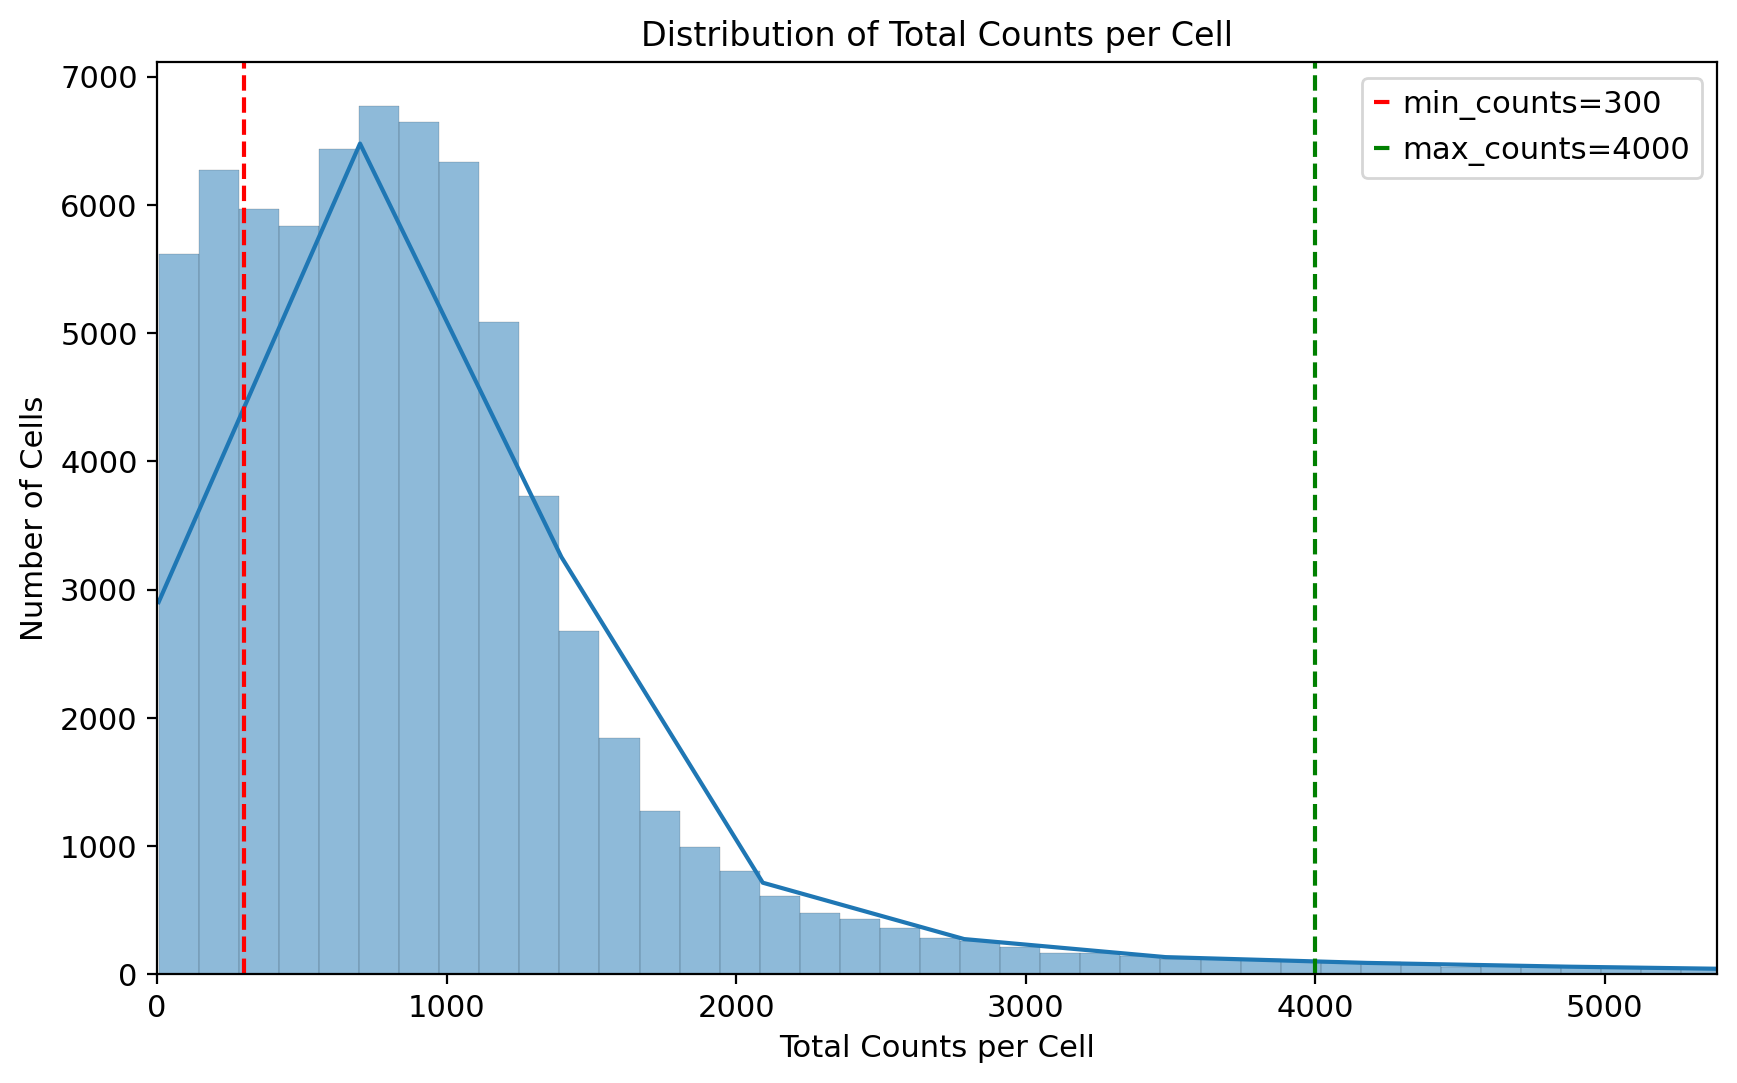

In [9]:
# Calculate total counts per cell
total_counts = adata_rna.obs['n_counts'] if 'n_counts' in adata_rna.obs else adata_rna.X.sum(axis=1).A1

# Calculate the 99th percentile to limit the x-axis
x_limit = np.percentile(total_counts, 99)

# Plot a histogram of total counts with more bins
plt.figure(figsize=(10, 6))
sns.histplot(total_counts, bins=1000, kde=True)  # Increased bins for more granularity
plt.xlabel('Total Counts per Cell')
plt.ylabel('Number of Cells')
plt.title('Distribution of Total Counts per Cell')
plt.axvline(x=ADATA_RNA_MIN, color='red', linestyle='--', label=f"min_counts={ADATA_RNA_MIN}")
plt.axvline(x=ADATA_RNA_MAX, color='green', linestyle='--', label=f"max_counts={ADATA_RNA_MAX}")
plt.xlim(0, x_limit)  # Limit the x-axis to the 99th percentile
plt.legend()
plt.show()


### Apply the  filter on cells

In [10]:
#Apply the filter on cells
sc.pp.filter_cells(adata_rna, min_counts=ADATA_RNA_MIN)
sc.pp.filter_cells(adata_rna, max_counts=ADATA_RNA_MAX)

### Keep only the top 1000 genes

In [11]:
import scvelo as scv
# Top 1000 variable genes are used for downstream analyses.
scv.pp.filter_and_normalize(adata_rna, min_shared_counts=10, n_top_genes=1000)

Filtered out 25252 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.


/opt/conda/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  comm

Extracted 1000 highly variable genes.
Logarithmized X.


/opt/conda/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


### Compare filtered loom object with the total object

In [12]:
# Find the intersection of observation names
common_obs_names = set(adata.obs_names).intersection(adata_rna.obs_names)

# Convert to a list if needed
common_obs_names = list(common_obs_names)

# Output the number of common observation names
print(f"Number of common observation names: {len(common_obs_names)}")

Number of common observation names: 10497


### Keep only the data that are present in the final object and insert the metadata in adata_rna

In [13]:
# Step 1: Subset adata_rna to only include common observation names
adata_rna = adata_rna[adata_rna.obs_names.isin(common_obs_names)].copy()

# Step 2: Create adata.obs2 containing only common observation names from adata.obs
adata_obs2 = adata.obs.loc[adata.obs_names.isin(common_obs_names)].copy()

# Step 3: Reorder adata_obs2 to match the order in adata_rna
adata_obs2 = adata_obs2.reindex(adata_rna.obs_names)

# Step 4: Add the information from adata_obs2 to adata_rna.obs
adata_rna.obs = pd.concat([adata_rna.obs, adata_obs2], axis=1)

/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [14]:
adata_rna.obs 

sample    n_counts  initial_size_unspliced  \
AACCTAATCACTTTAC-1_CSS1    CSS1  869.053650                     780   
AAAGCCGCACCTAAGC-1_CSS1    CSS1  850.919006                     748   
AAAGCCGCATCAGCAC-1_CSS1    CSS1  867.392456                     615   
AACCCGCAGCAATAGG-1_CSS1    CSS1  849.403320                    1540   
AAAGCAAGTTGTTGTC-1_CSS1    CSS1  851.691345                     699   
...                         ...         ...                     ...   
TGGTTGAGTTGTTGCT-1_CSS10  CSS10  894.341919                    1135   
TGCACTTGTGTTGCTT-1_CSS10  CSS10  867.002869                    1549   
TTAGCCTGTGCTGGTG-1_CSS10  CSS10  897.536804                    1956   
TTGACGTAGTGAGGGT-1_CSS10  CSS10  895.337708                    1350   
TGGACAAAGCGAGGTG-1_CSS10  CSS10  877.874451                    1081   

                          initial_size_spliced  initial_size orig.ident  \
AACCTAATCACTTTAC-1_CSS1                    374         374.0      BS840   
AAAGCCGCACCTAAGC-1_CSS1                    444         444.0      BS840   
AAAGCCGCATCAGCAC-1_CSS1                    474         474.0      BS840   
AACCCGCAGCAATAGG-1_CSS1                    677         677.0      BS840   
AAAGCAAGTTGTTGTC-1_CSS1                    648         648.0      BS840   
...                                        ...           ...        ...   
TGGTTGAGTTGTTGCT-1_CSS10                   585         585.0      BS897   
TGCACTTGTGTTGCTT-1_CSS10                   361         361.0      BS897   
TTAGCCTGTGCTGGTG-1_CSS10                   976         976.0      BS897   
TTGACGTAGTGAGGGT-1_CSS10                   906         906.0      BS897   
TGGACAAAGCGAGGTG-1_CSS10                   558         558.0      BS897   

                          nCount_RNA  nFeature_RNA  nCount_ATAC  \
AACCTAATCACTTTAC-1_CSS1         1883          1038        15828   
AAAGCCGCACCTAAGC-1_CSS1         1719           897        12227   
AAAGCCGCATCAGCAC-1_CSS1         1565           995         6618   
AACCCGCAGCAATAGG-1_CSS1         2965          1450         8605   
AAAGCAAGTTGTTGTC-1_CSS1         1802          1035        14306   
...                              ...           ...          ...   
TGGTTGAGTTGTTGCT-1_CSS10        2599          1396        16098   
TGCACTTGTGTTGCTT-1_CSS10        2603          1257        16661   
TTAGCCTGTGCTGGTG-1_CSS10        3982          1800        10065   
TTGACGTAGTGAGGGT-1_CSS10        3307          1543        20856   
TGGACAAAGCGAGGTG-1_CSS10        2344          1236        14711   

                          nFeature_ATAC       cell_type     sex smoker sample  \
AACCTAATCACTTTAC-1_CSS1            6476  Tumor_NK_cells    male  40 py   CSS1   
AAAGCCGCACCTAAGC-1_CSS1            5290  Tumor_NK_cells    male  40 py   CSS1   
AAAGCCGCATCAGCAC-1_CSS1            3028  Tumor_NK_cells    male  40 py   CSS1   
AACCCGCAGCAATAGG-1_CSS1            3870  Tumor_NK_cells    male  40 py   CSS1   
AAAGCAAGTTGTTGTC-1_CSS1            5994  Tumor_NK_cells    male  40 py   CSS1   
...                                 ...             ...     ...    ...    ...   
TGGTTGAGTTGTTGCT-1_CSS10           6246  Tumor_NK_cells  female  60 py  CSS10   
TGCACTTGTGTTGCTT-1_CSS10           6347  Tumor_NK_cells  female  60 py  CSS10   
TTAGCCTGTGCTGGTG-1_CSS10           4317  Tumor_NK_cells  female  60 py  CSS10   
TTGACGTAGTGAGGGT-1_CSS10           7727  Tumor_NK_cells  female  60 py  CSS10   
TGGACAAAGCGAGGTG-1_CSS10           5970  Tumor_NK_cells  female  60 py  CSS10   

                          nCount_peaks  nFeature_peaks  fragments      FRiP  \
AACCTAATCACTTTAC-1_CSS1           9531            7079      14359  0.663765   
AAAGCCGCACCTAAGC-1_CSS1           7066            5693       8788  0.804051   
AAAGCCGCATCAGCAC-1_CSS1           3919            3312       4832  0.811051   
AACCCGCAGCAATAGG-1_CSS1           5062            4201       6541  0.773888   
AAAGCAAGTTGTTGTC-1_CSS1           8418            6421      10314  0.816172   
...                

## Preprocessing the ATAC counts

In [15]:
#Load the atac object
# Specify the folder containing the .loom file
folder_path = os.path.join(
    PATH_TO_VELOCITY_FOLDER,
    SAMPLE_OF_INTEREST,
    f"{SAMPLE_OF_INTEREST}_filtered_feature_bc_matrix"
)

adata_atac = sc.read_10x_mtx(folder_path, var_names='gene_symbols', cache=True, gex_only=False)
adata_atac = adata_atac[:,adata_atac.var['feature_types'] == "Peaks"]

In [16]:
adata_atac

View of AnnData object with n_obs × n_vars = 2668 × 71783
    var: 'gene_ids', 'feature_types'

In [17]:
adata_atac.var

gene_ids feature_types
chr1:9786-10680                chr1:9786-10680         Peaks
chr1:180460-181311          chr1:180460-181311         Peaks
chr1:191176-192101          chr1:191176-192101         Peaks
chr1:267553-268449          chr1:267553-268449         Peaks
chr1:605078-605995          chr1:605078-605995         Peaks
...                                        ...           ...
KI270726.1:27170-28040  KI270726.1:27170-28040         Peaks
KI270726.1:41451-42313  KI270726.1:41451-42313         Peaks
KI270711.1:22555-23420  KI270711.1:22555-23420         Peaks
KI270713.1:21414-22298  KI270713.1:21414-22298         Peaks
KI270713.1:29671-30525  KI270713.1:29671-30525         Peaks

[71783 rows x 2 columns]

In [18]:
from comm import create_comm

In [19]:
# We aggregate peaks around each gene as well as those that have high correlations with promoter peak or gene expression.
# Peak annotation contains the metadata for all peaks.
# Feature linkage contains pairs of correlated genomic features.
adata_atac = mv.aggregate_peaks_10x(adata_atac,
                                    os.path.join(   PATH_TO_VELOCITY_FOLDER,    SAMPLE_OF_INTEREST,   f"{SAMPLE_OF_INTEREST}_atac_peak_annotation.tsv"),
                                    os.path.join(   PATH_TO_VELOCITY_FOLDER,    SAMPLE_OF_INTEREST,   f"{SAMPLE_OF_INTEREST}_feature_linkage.bedpe")
)
                        

CellRanger ARC identified as 2.0.0

Found 17207 genes with promoter peaks



/home/rebuffet/.local/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/17207 [00:00<?, ?it/s]

In [20]:
print(adata_atac)
print(type(adata_atac.X))

View of AnnData object with n_obs × n_vars = 2668 × 17207
<class 'anndata._core.views.SparseCSRView'>


In [21]:
import pandas as pd

# Convert the first 5 rows and 5 columns to a Pandas DataFrame
df_preview = pd.DataFrame(adata_atac.X[:5, :5].todense(), 
                          index=adata_atac.obs_names[:5], 
                          columns=adata_atac.var_names[:5])

# Display the values
print(df_preview)


                    LINC01409  FAM87B  LINC01128  LINC00115  FAM41C
AAACAGCCAAAGCGGC-1        2.0     0.0        0.0        0.0     0.0
AAACAGCCAGCAACAG-1        4.0     0.0        2.0        2.0     0.0
AAACAGCCAGTAAAGC-1        2.0     0.0        0.0        0.0     0.0
AAACAGCCATTGTCAG-1        2.0     0.0        0.0        0.0     0.0
AAACATGCAAACGCGA-1        2.0     0.0        0.0        0.0     0.0


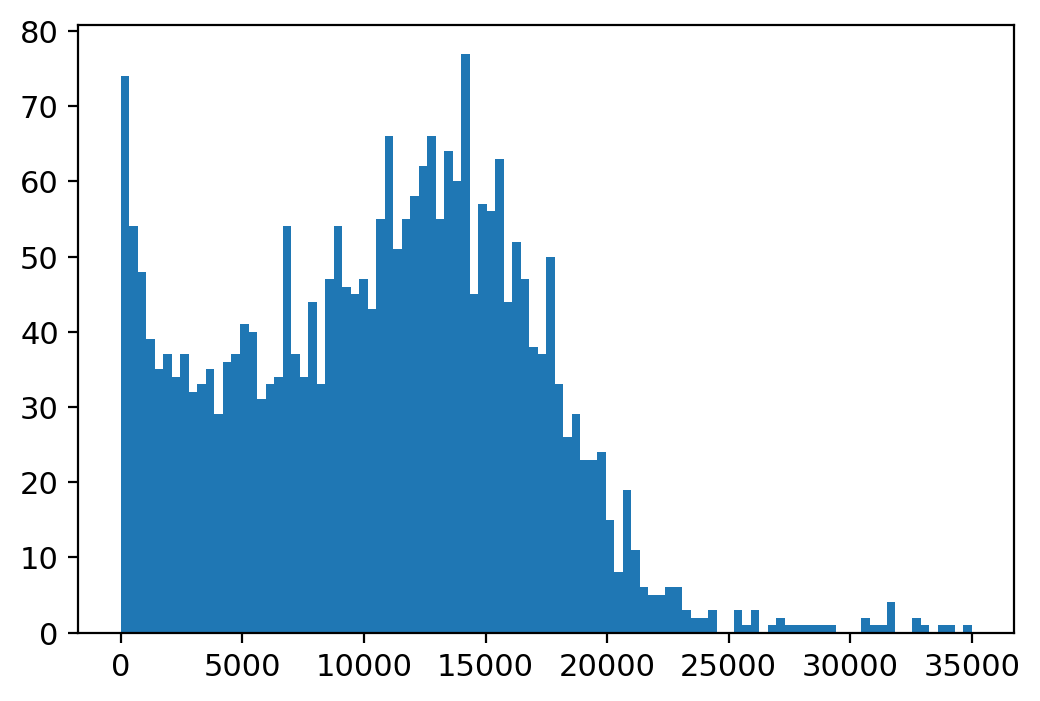

In [22]:
# Let's examine the total count distribution and remove outliers.
plt.hist(adata_atac.X.sum(1), bins=100, range=(0, ADATA_ATAC_MAX));

/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


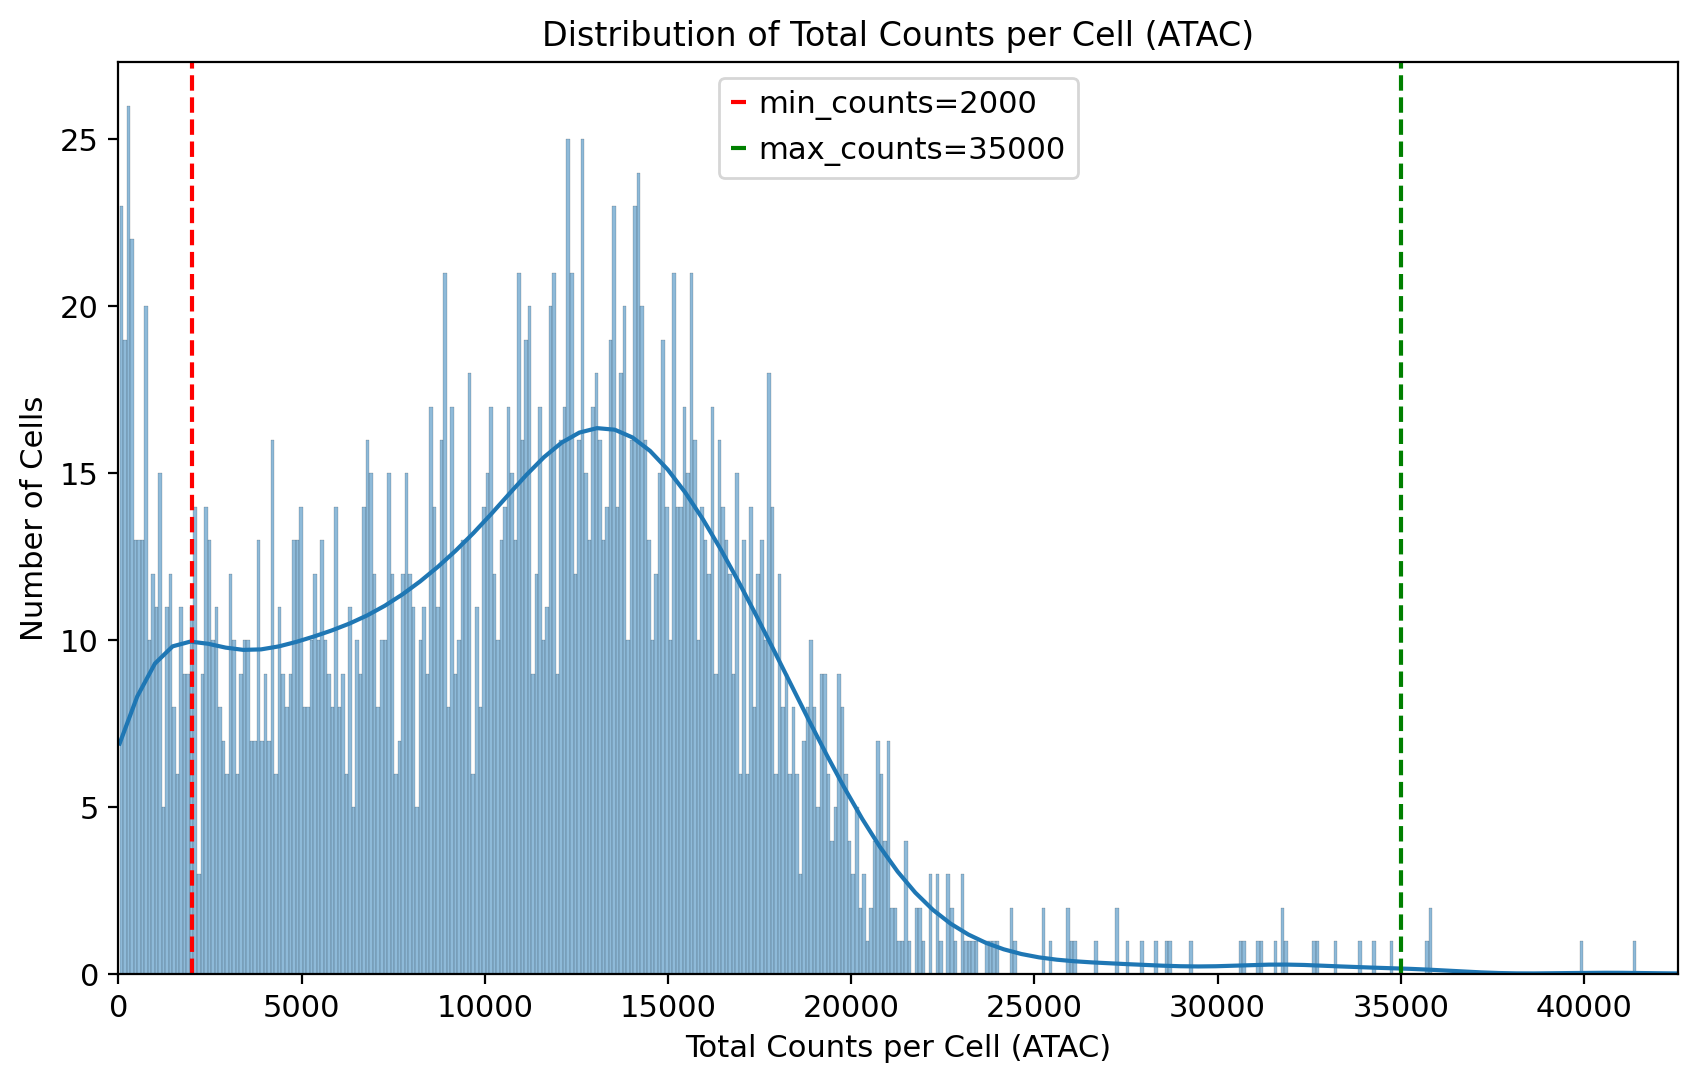

In [23]:
# Calculate total counts per cell for ATAC-seq
total_counts_atac = adata_atac.obs['n_counts'] if 'n_counts' in adata_atac.obs else adata_atac.X.sum(axis=1).A1

# Calculate the 99th percentile to limit the x-axis
x_limit_atac = np.percentile(total_counts_atac, 99.9)

# Plot histogram of total counts per cell
plt.figure(figsize=(10, 6))
sns.histplot(total_counts_atac, bins=1000, kde=True)  # High granularity bins + KDE curve
plt.xlabel('Total Counts per Cell (ATAC)')
plt.ylabel('Number of Cells')
plt.title('Distribution of Total Counts per Cell (ATAC)')
plt.axvline(x=ADATA_ATAC_MIN, color='red', linestyle='--', label=f"min_counts={ADATA_ATAC_MIN}")
plt.axvline(x=ADATA_ATAC_MAX, color='green', linestyle='--', label=f"max_counts={ADATA_ATAC_MAX}")
plt.xlim(0, x_limit_atac)  # Limit the x-axis to the 99th percentile
plt.legend()
plt.show()


In [24]:
sc.pp.filter_cells(adata_atac, min_counts= ADATA_ATAC_MIN)
sc.pp.filter_cells(adata_atac, max_counts= ADATA_ATAC_MAX)

In [25]:
# We normalize aggregated peaks with TF-IDF.
mv.tfidf_norm(adata_atac)

In [26]:
adata_atac


# Convert the first 5 rows and 5 columns to a Pandas DataFrame
df_preview = pd.DataFrame(adata_atac.X[:5, :5].todense(), 
                          index=adata_atac.obs_names[:5], 
                          columns=adata_atac.var_names[:5])

# Display the values
print(df_preview)

                    LINC01409  FAM87B  LINC01128  LINC00115  FAM41C
AAACAGCCAAAGCGGC-1   0.865160     0.0   0.000000   0.000000     0.0
AAACAGCCAGCAACAG-1   1.650835     0.0   1.235315   1.235315     0.0
AAACAGCCAGTAAAGC-1   1.119350     0.0   0.000000   0.000000     0.0
AAACAGCCATTGTCAG-1   1.065863     0.0   0.000000   0.000000     0.0
AAACATGCAAACGCGA-1   0.887783     0.0   0.000000   0.000000     0.0


### Loading directly the data from extracted from R pipeline as input

In [27]:
import pandas as pd

# Read the CSV file of the Gene activity
df = pd.read_csv(os.path.join(PATH_ANALYSIS_OUTPUT , "Peaks_gene_activity","Gene_activity_counts_dense.csv"), index_col=0)

#Turn in into an anndata
adata_atac = sc.AnnData(df)

#Turn it into a sparse format to make it compatible with the rest
import scipy.sparse as spp
adata_atac.X = spp.csr_matrix(adata_atac.X)

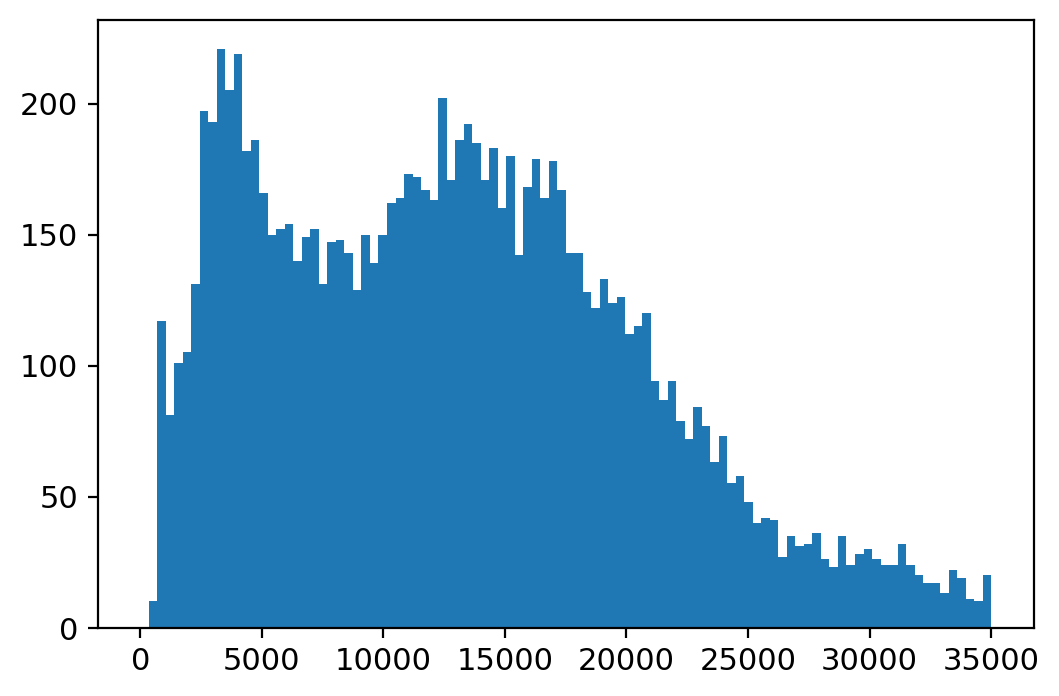

In [28]:
# Let's examine the total count distribution and remove outliers.
plt.hist(adata_atac.X.sum(1), bins=100, range=(0, ADATA_ATAC_MAX));

/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


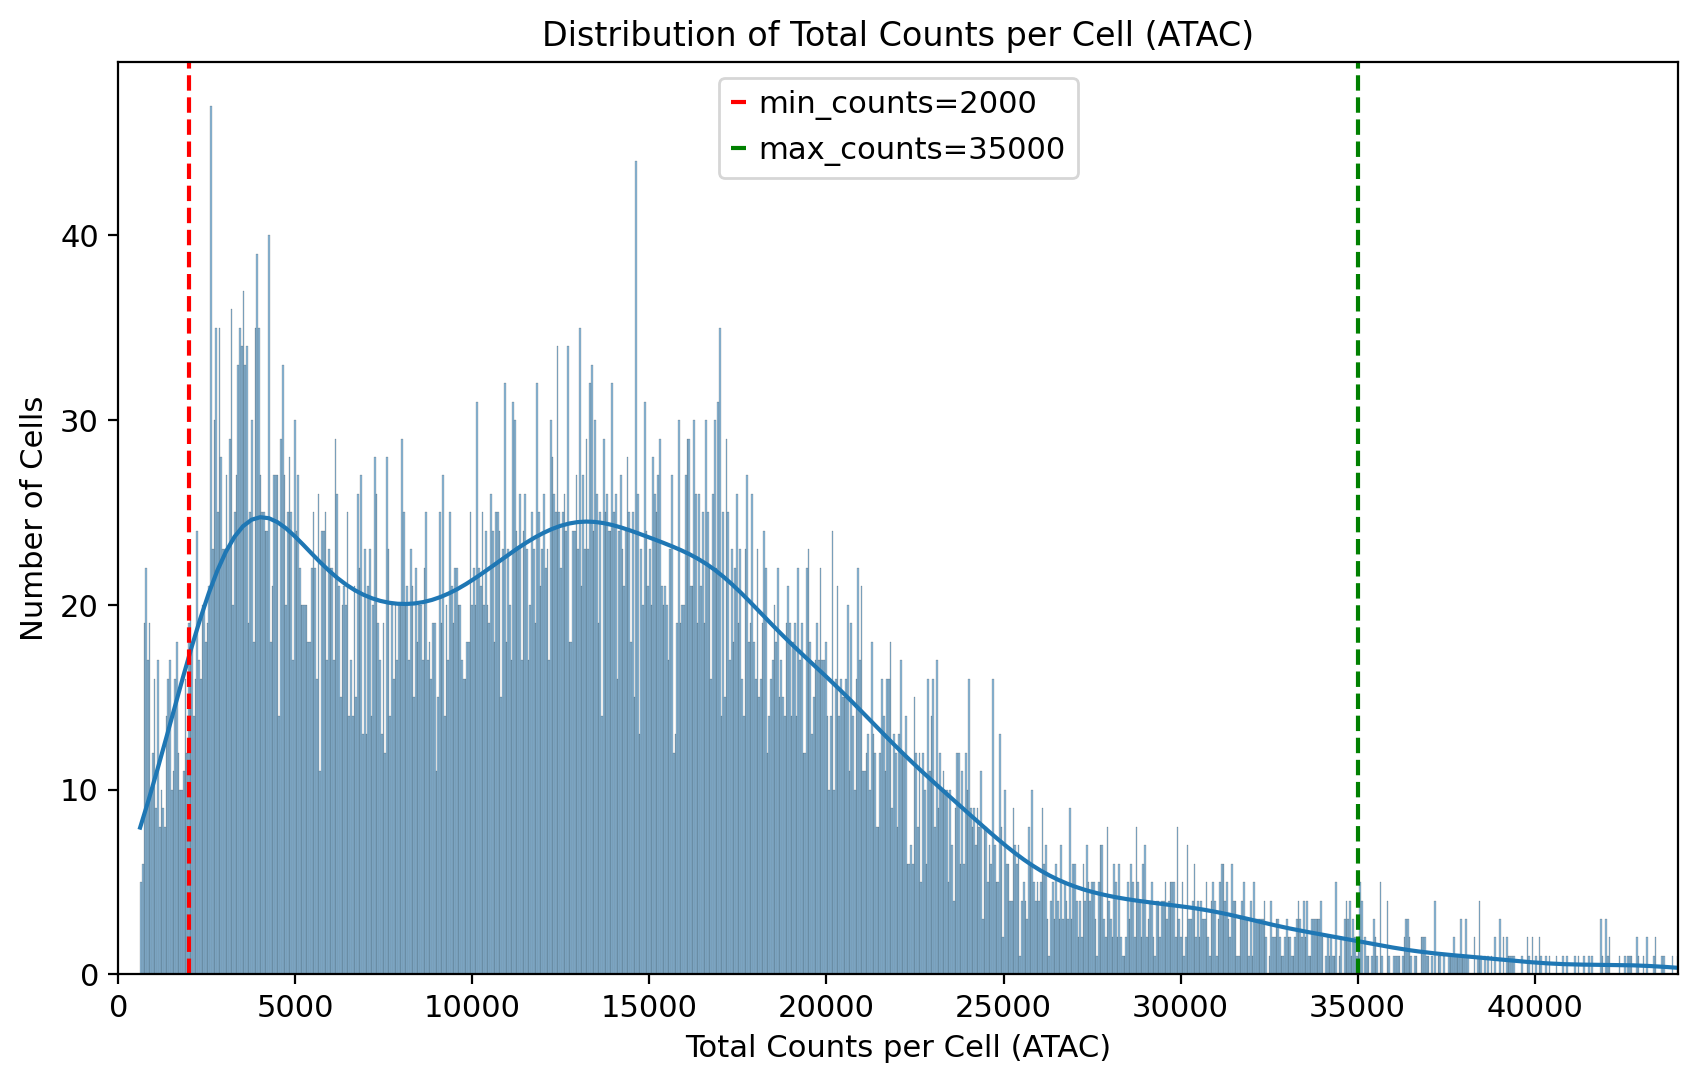

In [29]:
# Calculate total counts per cell for ATAC-seq
total_counts_atac = np.array(adata_atac.X.sum(axis=1)).flatten()  # Ensure it's a 1D NumPy array

# Calculate the 99th percentile to limit the x-axis
x_limit_atac = np.percentile(total_counts_atac, 99.9)

# Plot histogram of total counts per cell
plt.figure(figsize=(10, 6))
sns.histplot(total_counts_atac, bins=1000, kde=True)  # High granularity bins + KDE curve
plt.xlabel('Total Counts per Cell (ATAC)')
plt.ylabel('Number of Cells')
plt.title('Distribution of Total Counts per Cell (ATAC)')
plt.axvline(x=ADATA_ATAC_MIN, color='red', linestyle='--', label=f"min_counts={ADATA_ATAC_MIN}")
plt.axvline(x=ADATA_ATAC_MAX, color='green', linestyle='--', label=f"max_counts={ADATA_ATAC_MAX}")
plt.xlim(0, x_limit_atac)  # Limit the x-axis to the 99th percentile
plt.legend()
plt.show()


In [30]:
sc.pp.filter_cells(adata_atac, min_counts= ADATA_ATAC_MIN)
sc.pp.filter_cells(adata_atac, max_counts= ADATA_ATAC_MAX)

In [31]:
# We normalize aggregated peaks with TF-IDF.
mv.tfidf_norm(adata_atac)

## Finding shared barcodes and features between RNA and ATAC

In [32]:
# Update observation names by swapping the prefix and barcode
adata_atac.obs_names = adata_atac.obs_names.str.replace(r"^(CSS\d+)_(.+)$", r"\2_\1", regex=True)

In [33]:
shared_cells = pd.Index(np.intersect1d(adata_rna.obs_names, adata_atac.obs_names))
shared_genes = pd.Index(np.intersect1d(adata_rna.var_names, adata_atac.var_names))
len(shared_cells), len(shared_genes)

(9609, 794)

## Reload the data in and carry on with a subset of cells

In [34]:
# We reload in the raw data and continue with a subset of cells.
#For this we directly make use of the raw loom dictionnary of each sample built above
# Add a column indicating the sample name in each AnnData object
for sample, adata_loop in adata_rna_dict.items():
    adata_loop.obs['sample'] = sample  # Add sample name as metadata

# Merge all AnnData objects into a single one
adata_merged = sc.concat(list(adata_rna_dict.values()), label="sample", keys=list(adata_rna_dict.keys()))

# Extract the var slot (it's the same for all samples
var_to_add = adata_rna_dict["CSS13"].var

#Insert the slot
adata_merged.var = var_to_add


In [35]:
adata_rna = adata_merged

In [36]:
adata_rna = adata_rna[shared_cells, shared_genes]
adata_atac = adata_atac[shared_cells, shared_genes]

In [37]:
#Add the metadata to the two objects
meta_data_table = pd.read_csv(os.path.join(PATH_ANALYSIS_OUTPUT , "cell_data.csv"), index_col=0)

#Reformat the names
# Convert metadata row names to match adata format
meta_data_table.index = meta_data_table.index.str.replace(r"^(CSS\d+)_(.+)$", r"\2_\1", regex=True)

# Find common cell names
common_cells = adata_rna.obs_names.intersection(meta_data_table.index)

# Subset metadata to only include common cells
meta_data_table = meta_data_table.loc[common_cells]

# Check if adata_rna_row order is the same as adata_atac row order  and metadata order is correct
assert all(meta_data_table.index == adata_atac.obs.index), "Mismatch between meta_data_table and adata_atac.obs.index!"
assert all(adata_atac.obs.index == adata_atac.obs_names), "Mismatch between adata_atac.obs.index and adata_atac.obs_names!"
assert all(meta_data_table.index == adata_atac.obs_names), "Mismatch between meta_data_table and adata_atac.obs_names!"

print("✅ All indices are correctly aligned!")

# Add metadata to adata_rna
# Drop the "sample" column if it exists
if "sample" in adata_rna.obs.columns:
    adata_rna.obs.drop(columns=["sample"], inplace=True)
    
adata_rna.obs = adata_rna.obs = adata_rna.obs.join(meta_data_table, how="left")

# Add metadata to adata_atac
adata_atac.obs = adata_atac.obs.join(meta_data_table, how="left")


✅ All indices are correctly aligned!


In [38]:
#Running standard procedure
scv.pp.normalize_per_cell(adata_rna)
scv.pp.log1p(adata_rna)
scv.pp.moments(adata_rna, n_pcs=30, n_neighbors=50)

Normalized count data: X, spliced, unspliced.


/tmp/ipykernel_1497766/1157875168.py:3: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata_rna)
/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


computing neighbors
    finished (0:00:25) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [39]:
#Make sure that data annotation is categorial
adata_rna.obs[CELL_TYPE_COLNAME] = adata_rna.obs[CELL_TYPE_COLNAME].astype('category')

/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


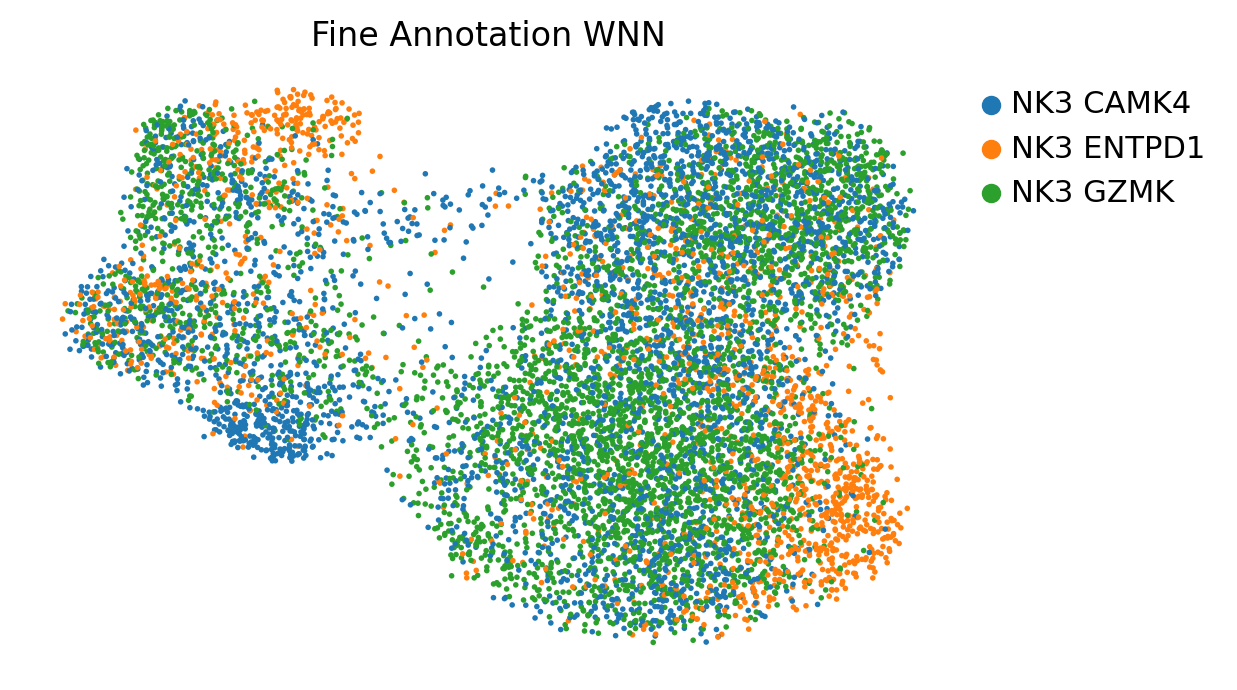

In [40]:
scv.tl.umap(adata_rna)
scv.pl.umap(adata_rna, color= CELL_TYPE_COLNAME)

/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


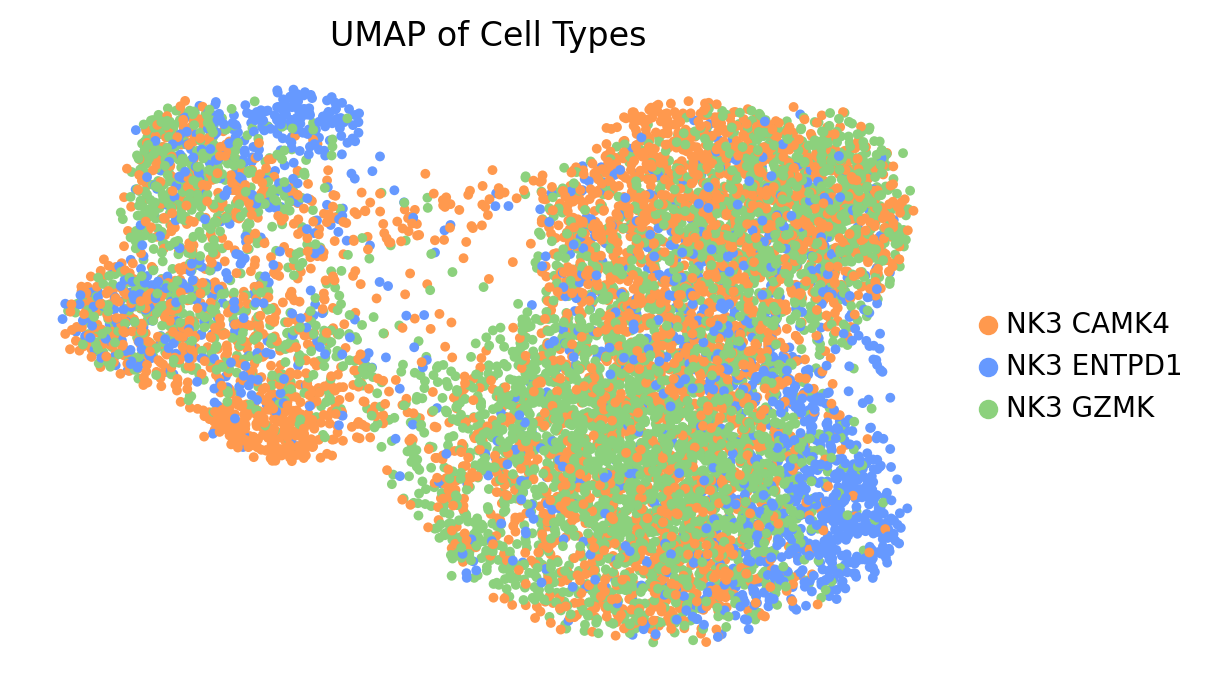

In [41]:
import scvelo as scv

# Ensure that the color map is defined for the specific clusters
cluster_color_map = dict(zip(cluster_names, color_codes))

# Optionally, add titles and labels for better visualization
scv.pl.umap(
    adata_rna, 
    color=CELL_TYPE_COLNAME, 
    palette=cluster_color_map, 
    size=50, 
    legend_loc='right', 
    legend_fontsize=10,
    title='UMAP of Cell Types', 
    xlabel='UMAP 1', 
    ylabel='UMAP 2', 
    frameon=False
)


In [42]:
#Inject WNN UMAP dimensions in the object
WNN = pd.read_csv(os.path.join( PATH_ANALYSIS_OUTPUT, "Embeddings/WNN_UMAP_TABLE.csv"), index_col = 0)
# Modify the row names to the desired format
WNN.index = [f"{cell.split('_')[1]}_{cell.split('_')[0]}" for cell in WNN.index]
WNN = WNN.reindex(adata_rna.obs.index)

#Inject into the object
# set them in the umap slot
adata_rna.obsm['X_umap'] = WNN.to_numpy()

/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


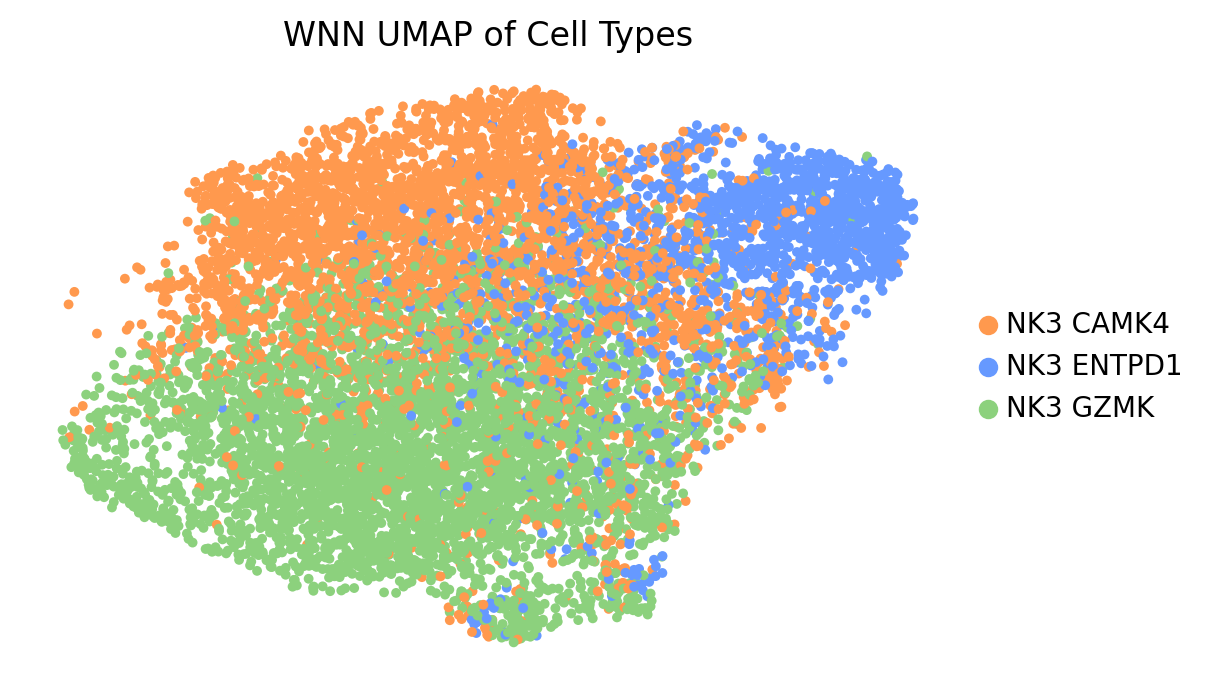

In [43]:
# Plot the UMAP using the 'X_wnn_umap' embedding
# Optionally, add titles and labels for better visualization
scv.pl.umap(
    adata_rna, 
    color=CELL_TYPE_COLNAME, 
    palette=cluster_color_map, 
    size=50, 
    legend_loc='right', 
    legend_fontsize=10,
    title='WNN UMAP of Cell Types', 
    xlabel='UMAP 1', 
    ylabel='UMAP 2', 
    frameon=False
)


## Saving the filtered cells

In [44]:
# Write out filtered cells and prepare to run Seurat WNN --> R script can be found on Github.
# Construct the file path
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Out_01a_Filteredcells_per_indiv_sample", "filtered_cells","filtered_cells.txt"
)

# Create directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the obs_names to the specified file path
adata_rna.obs_names.to_frame().to_csv(file_path, header=False, index=False)

# Print the file path to confirm where the file was saved
print(f"Filtered cells saved to: {file_path}")


Filtered cells saved to: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Out_01a_Filteredcells_per_indiv_sample/filtered_cells/filtered_cells.txt


In [45]:
#save the adata_rna and adata_atac objects
# Construct the file path
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Out_01a_Filteredcells_per_indiv_sample", "adata_rna", "adata_rna.h5ad"
)

# Create directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)


# Save the obs_names to the specified file path
adata_rna.write(file_path)

#save the adata_rna and adata_atac objects
# Construct the file path
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Out_01a_Filteredcells_per_indiv_sample", "adata_atac",
    "adata_atac.h5ad"
)

# Create directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the obs_names to the specified file path
adata_atac.write(file_path)

# Run the 01b pipeline in R to get the WNN neighbors !

## Smoothing gene aggregated peaks by neighbors

In [46]:
PATH_ANALYSIS_OUTPUT

'/mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together'

In [47]:
# Read in Seurat WNN neighbors.
nn_idx = np.loadtxt(os.path.join( PATH_ANALYSIS_OUTPUT,"Neighborhood_Graph" ,"nn_idx.txt"), delimiter=',')
nn_dist = np.loadtxt(os.path.join(PATH_ANALYSIS_OUTPUT,"Neighborhood_Graph" ,"nn_dist.txt"), delimiter=',')
nn_cells = pd.Index(pd.read_csv(os.path.join( PATH_ANALYSIS_OUTPUT,"Neighborhood_Graph","nn_cells.txt"), header=None)[0])

# Transform the format back
nn_cells = nn_cells.str.replace(r'^(CSS\d+)_(.+-1)$', r'\2_\1', regex=True)



In [48]:
#Change the order of Neigbor graph to match adata_atac order
# Step 1: Create a mapping from cell names to their current (original) index positions
cell_order = pd.Series(index=nn_cells, data=np.arange(len(nn_cells)))  # Mapping from cell names to original indices

# Step 2: Determine the new order based on adata_atac.obs_names
new_order = np.array([cell_order[cell] for cell in adata_atac.obs_names])  # New order as index positions

# Step 3: Reorder the three objects
nn_cells = nn_cells[new_order]  # Reorder cell names
nn_idx = nn_idx[new_order] - 1  # Convert 1-based to 0-based indices
nn_dist = nn_dist[new_order]    # Reorder distances accordingly

# Step 4: Create a mapping from old 0-based indices to new 0-based indices
index_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(new_order)}

# Step 5: Update nn_idx using the new mapping and convert back to 1-based indexing
nn_idx = np.vectorize(index_mapping.get)(nn_idx) + 1  # Convert back to 1-based indexing

# Final check
print(nn_cells[:5])  # Should match adata_atac.obs_names[:5]
print(nn_idx[:5, :5])  # Should now refer to correct new positions
print(nn_dist[:5, :5])  # Distances remain unchanged


Index(['AAACAGCCAAGCCAGA-1_CSS21', 'AAACAGCCACCACAAC-1_CSS23',
       'AAACAGCCACCGGCTA-1_CSS19', 'AAACAGCCAGGTTATT-1_CSS21',
       'AAACAGCCATTATGAC-1_CSS16'],
      dtype='object', name=0)
[[8753 2732 9446 5156 5355]
 [6563 3725 6786  961 3344]
 [1709 6503 5336 9226 7480]
 [2292 6360 1077 9584 8216]
 [7124  534 9161 3339 1467]]
[[0.32442738 0.34476973 0.36096581 0.36929898 0.37742617]
 [0.3528672  0.37812398 0.37855832 0.37919898 0.39692004]
 [0.28448553 0.3521953  0.36153187 0.38905618 0.39033293]
 [0.2302516  0.26199448 0.29399356 0.34529037 0.35484874]
 [0.35034665 0.35861406 0.36254438 0.37302555 0.38052959]]


In [49]:
# Make sure cell names match.
np.all(nn_cells == adata_atac.obs_names)

True

In [50]:
mv.knn_smooth_chrom(adata_atac, nn_idx, nn_dist)

In [51]:
# Save the adata_rna and adata_atac result for use later on
# Construct the file path
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT,"Out_01c_MultiVeloAnalysis" ,"before_running_multiVelo","adata_rna_result.h5ad"
)

# Save the AnnData object to the specified file path
adata_rna.write(file_path)

# Print the file path to confirm the save location
print(f"adata_rna Result saved to: {file_path}")


# Save the adata_rna and adata_atac result for use later on
# Construct the file path
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT,"Out_01c_MultiVeloAnalysis" ,"before_running_multiVelo","adata_atac_result.h5ad"
)

# Save the AnnData object to the specified file path
adata_atac.write(file_path)


# Print the file path to confirm the save location
print(f"adata_atac Result saved to: {file_path}")


adata_rna Result saved to: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Out_01c_MultiVeloAnalysis/before_running_multiVelo/adata_rna_result.h5ad
adata_atac Result saved to: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Out_01c_MultiVeloAnalysis/before_running_multiVelo/adata_atac_result.h5ad


## Running multi-omic dynamical model

In [52]:
#This will take a while. Parallelization is high recommended.
mv.settings.VERBOSITY = 0

adata_result = mv.recover_dynamics_chrom(adata_rna,
                                         adata_atac,
                                         max_iter=5,
                                         init_mode="invert",                                         
                                         parallel=True,
                                         save_plot=False,
                                         rna_only=False,
                                         fit=True,
                                         n_anchors=500,                                    
                                         extra_color_key=CELL_TYPE_COLNAME)

/home/rebuffet/.local/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/794 [00:00<?, ?it/s]

In [53]:
# Save the result for use later on
# Construct the file path
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT,"Out_01c_MultiVeloAnalysis" ,"multi_velo_results","multivelo_result.h5ad"
)

# Save the AnnData object to the specified file path
adata_result.write(file_path)

# Print the file path to confirm the save location
print(f"Result saved to: {file_path}")

Result saved to: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Out_01c_MultiVeloAnalysis/multi_velo_results/multivelo_result.h5ad


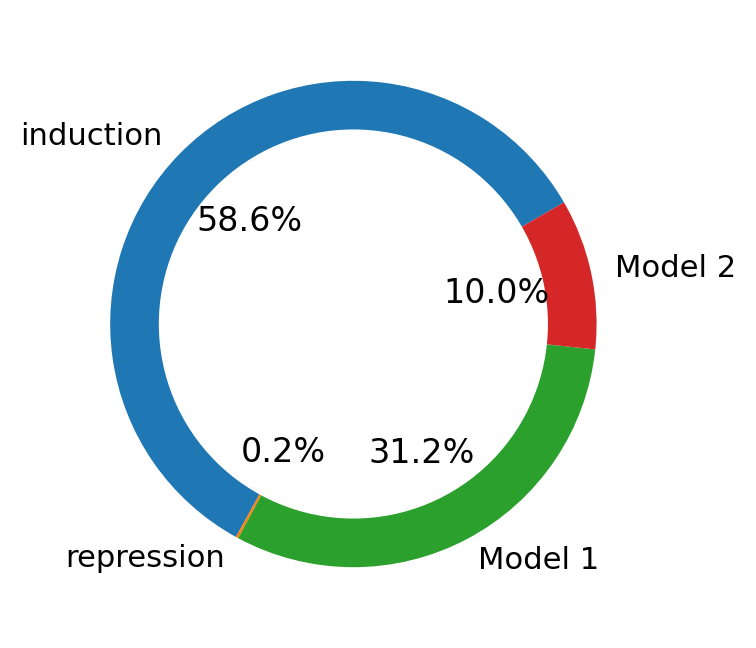

In [54]:
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Quality_metrics_Plots", 
    "Plot1.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

mv.pie_summary(adata_result)

# Generate the pie summary plot
mv.pie_summary(adata_result)

# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')

# Close the figure to free memory
plt.close()

/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (D

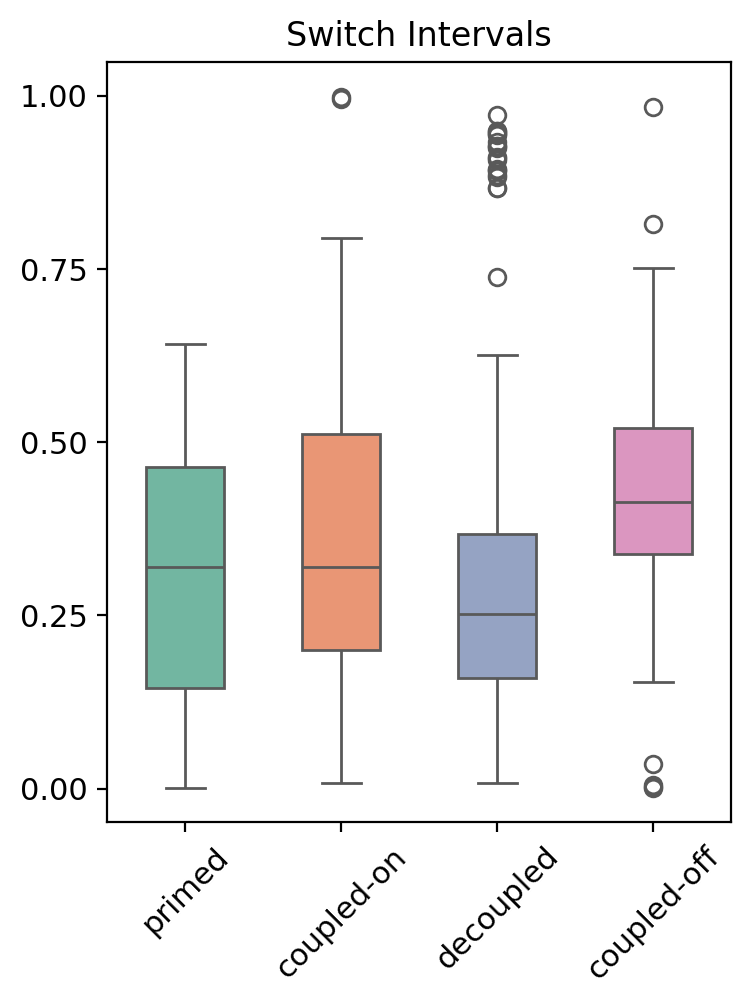

In [55]:
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Quality_metrics_Plots", 
    "Plot2.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)


# Generate the switch time summary plot
mv.switch_time_summary(adata_result)
plt.xticks(rotation=45)  # Rotate the labels by 45 degrees (adjust the angle as needed)

# Rotate the x-axis labels
mv.switch_time_summary(adata_result)
plt.xticks(rotation=45)  # Rotate the labels by 45 degrees (adjust the angle as needed)
# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')

# Close the figure to free memory
plt.close()

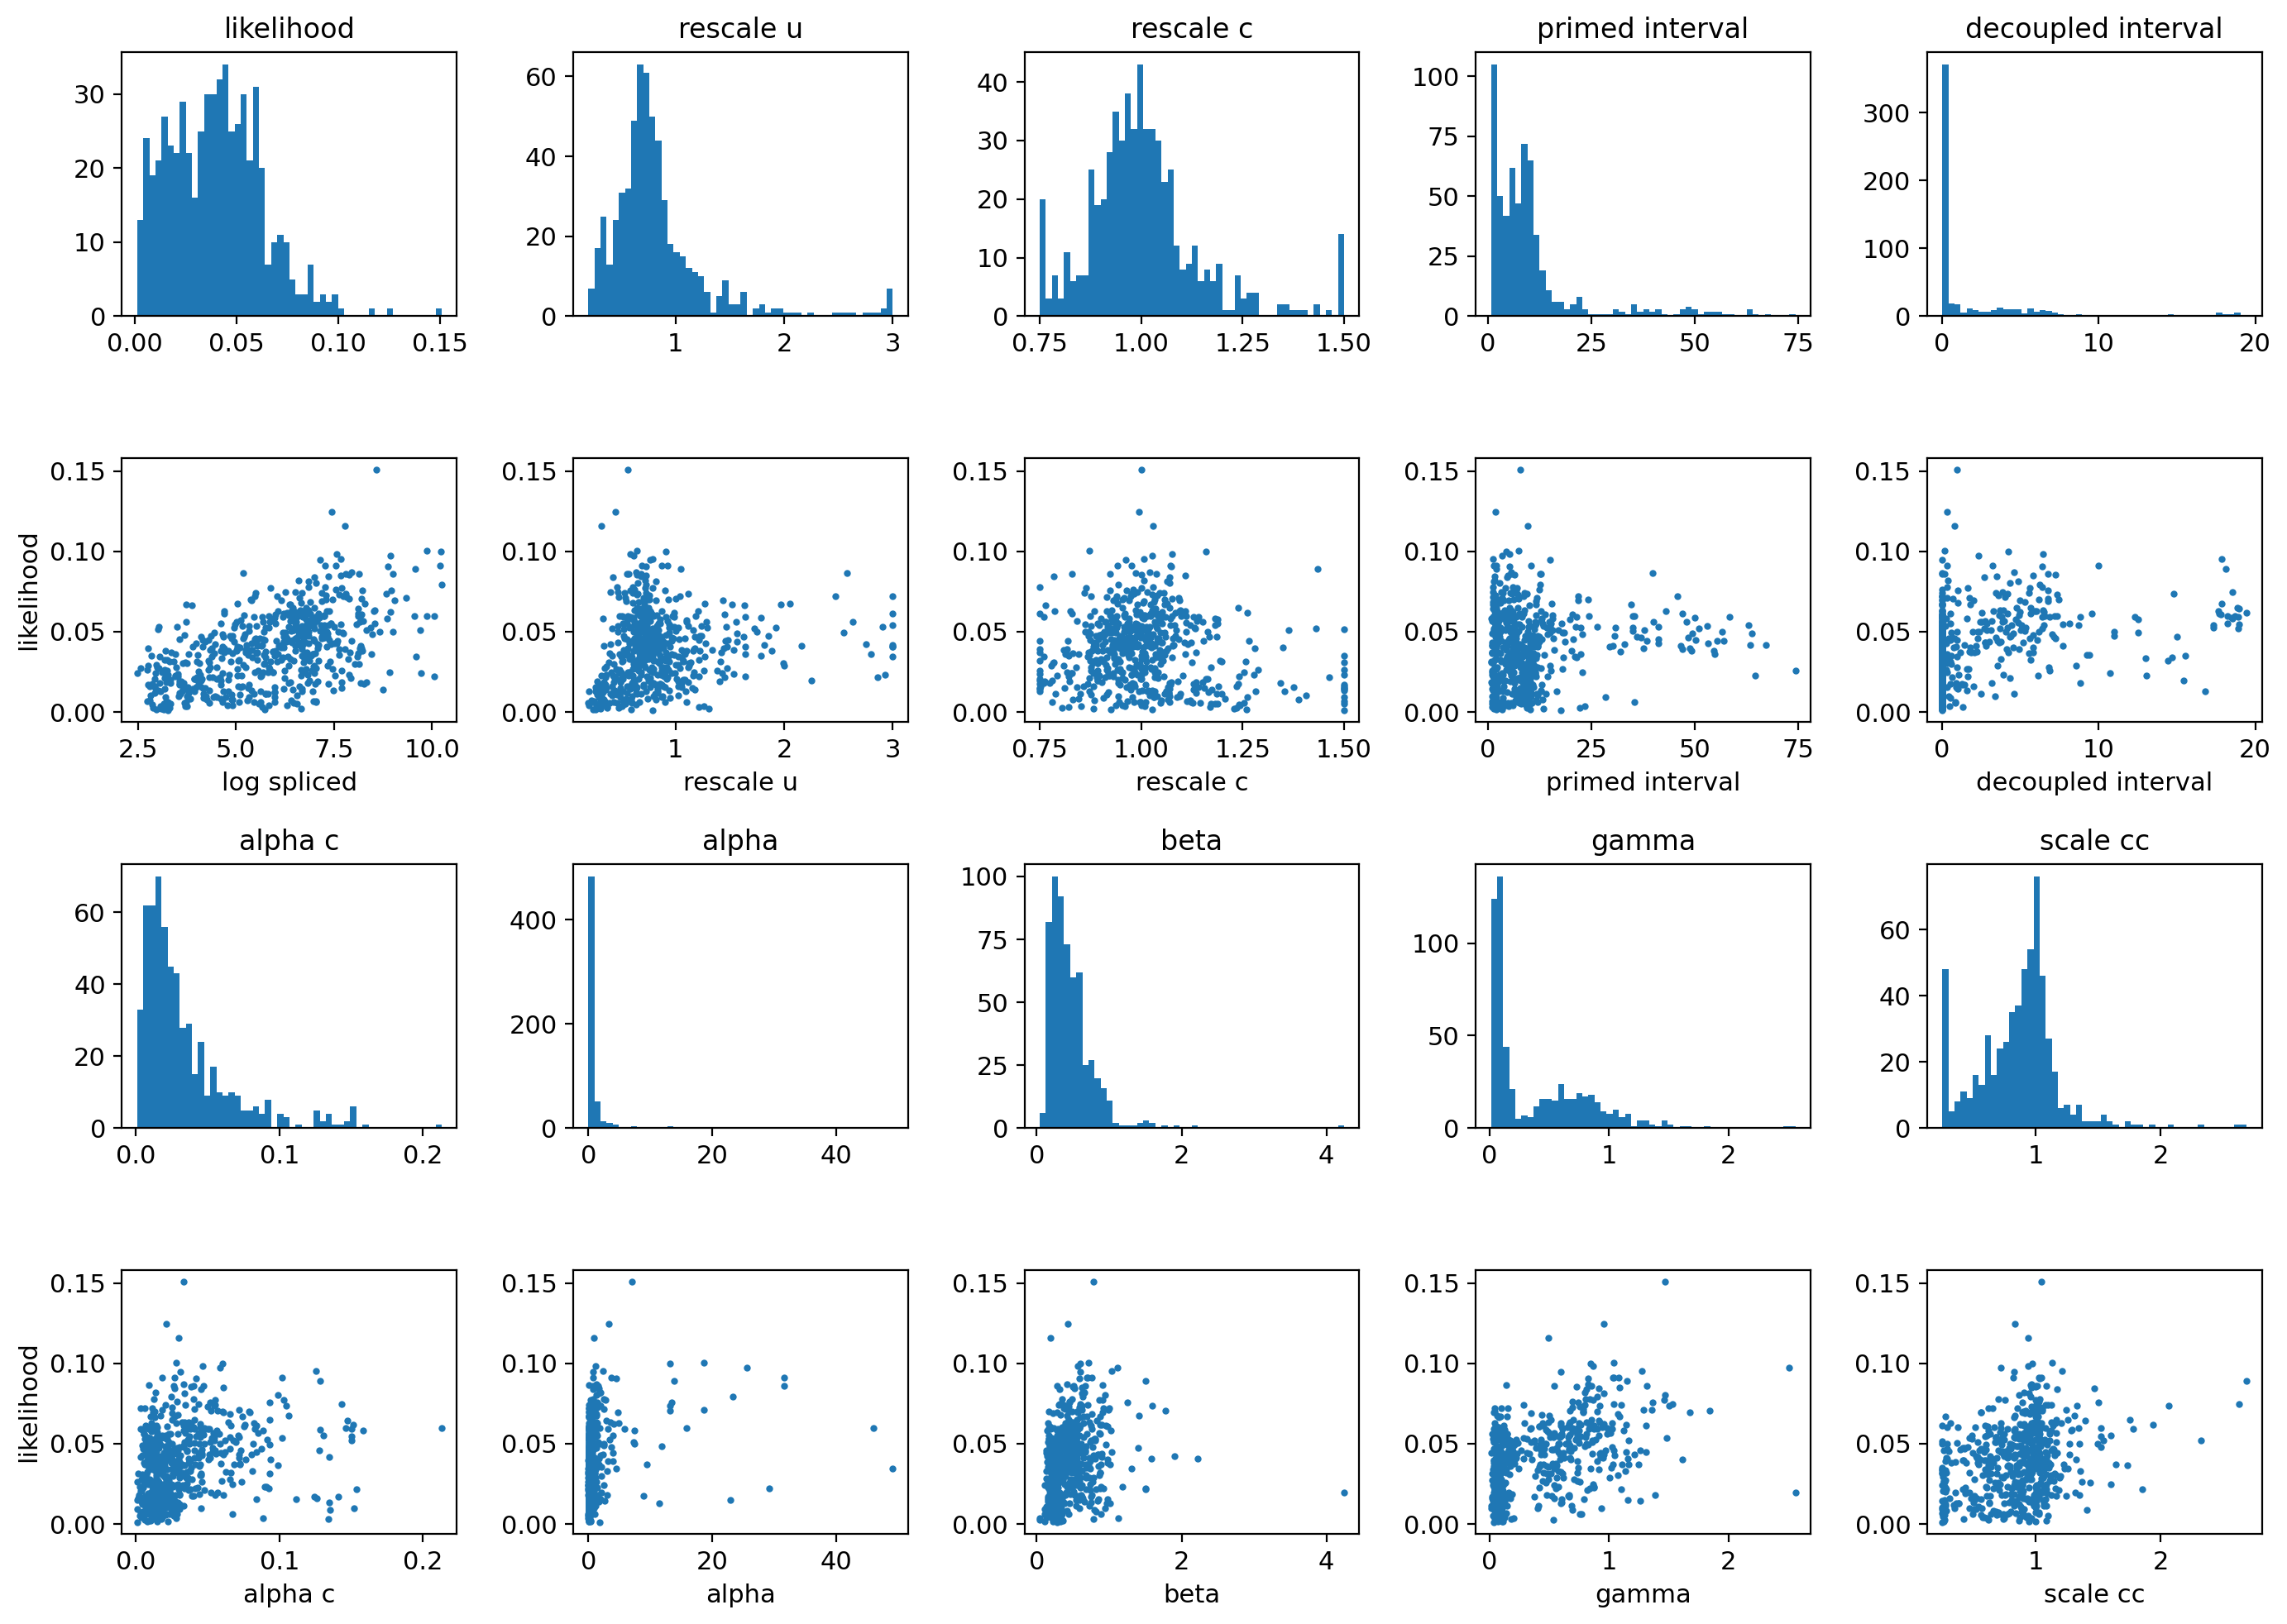

In [56]:
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Quality_metrics_Plots", 
    "Plot3.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

mv.likelihood_plot(adata_result)

# Generate the pie summary plot
mv.likelihood_plot(adata_result)

# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')

# Close the figure to free memory
plt.close()


## Computing velocity stream and latent time

In [57]:
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph (using 1/40 cores)


/home/rebuffet/.local/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/9609 [00:00<?, ?cells/s]

    finished (0:00:20) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:04) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:03) --> added 
    'latent_time', shared time (adata.obs)


In [58]:
# Ensure that the color map is defined for the specific clusters
cluster_color_map = dict(zip(cluster_names, color_codes))

cluster_color_map

{'NK1_FGFBP2': '#E15759',
 'NK1_CCL4': '#FF9D9A',
 'NK_NFKB1': '#86BCB6',
 'NK2': '#499894',
 'NK3_GZMK': '#8CD17D',
 'NK3_CAMK4': '#FF994E',
 'NK3_ENTPD1': '#6699FF',
 'NKprol': '#CC99FF',
 'ILC1': '#999999',
 'ILC3': '#CCCCCC'}

In [59]:
CELL_TYPE_COLNAME

'Fine_Annotation_WNN'

computing velocity embedding
    finished (0:00:03) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)


/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


saving figure to file /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Figures/Velocity_streams/Velostream.svg


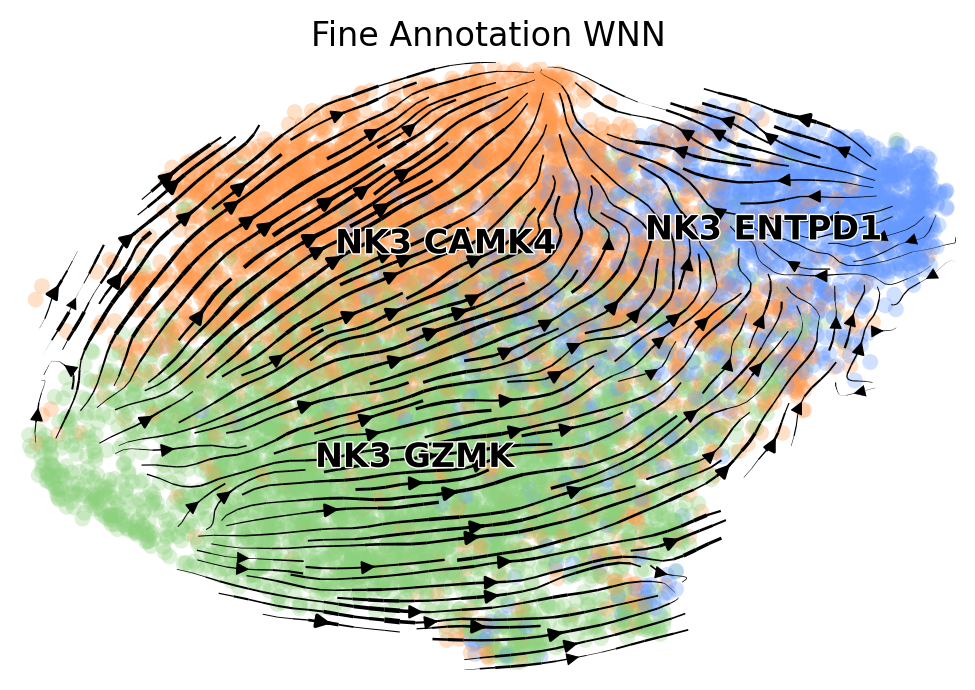

Velocity stream plot saved to: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Figures/Velocity_streams/Velostream.svg


In [60]:
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Velocity_streams", 
    "Velostream.svg"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Generate and save the velocity embedding stream plot
mv.velocity_embedding_stream(adata_result, basis='umap', color=CELL_TYPE_COLNAME, save=file_path, palette = cluster_color_map)

# Confirm the plot has been saved
print(f"Velocity stream plot saved to: {file_path}")

/opt/conda/lib/python3.11/site-packages/pandas/core/algorithms.py:514: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


figure cannot be saved as pdf, using png instead (can only output finite numbers in pdf).
saving figure to file /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Figures/Velocity_streams/Velostream.png


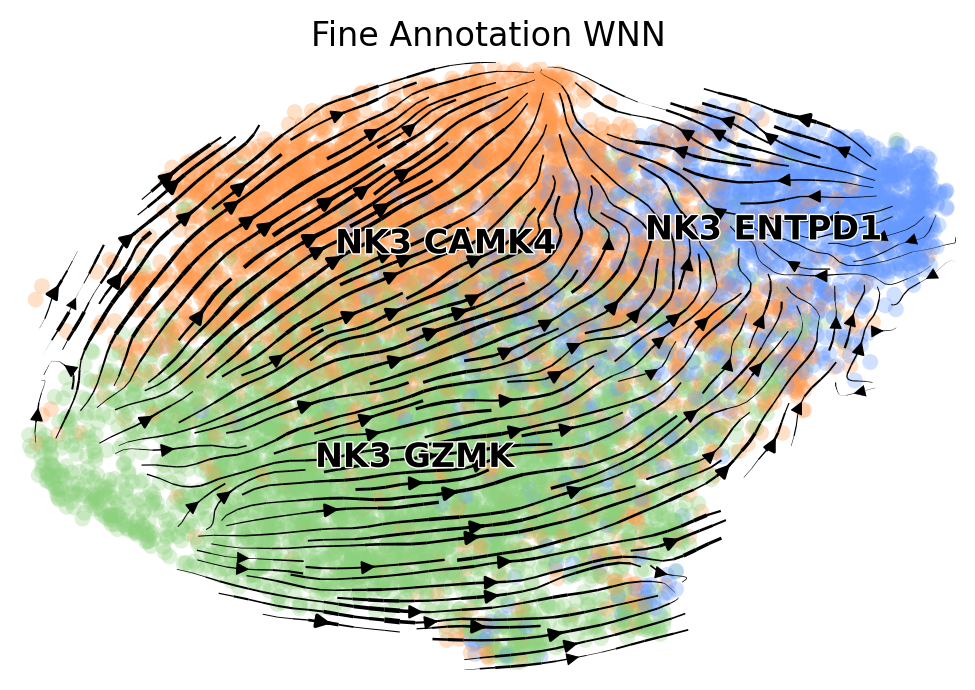

Velocity stream plot saved to: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Figures/Velocity_streams/Velostream.pdf


In [63]:
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Velocity_streams", 
    "Velostream.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Generate and save the velocity embedding stream plot
mv.velocity_embedding_stream(adata_result, basis='umap', color=CELL_TYPE_COLNAME, save=file_path, palette = cluster_color_map)

# Confirm the plot has been saved
print(f"Velocity stream plot saved to: {file_path}")

saving figure to file /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Figures/Velocity_streams_per_pseudotime/Velostream_pseudotime.pdf


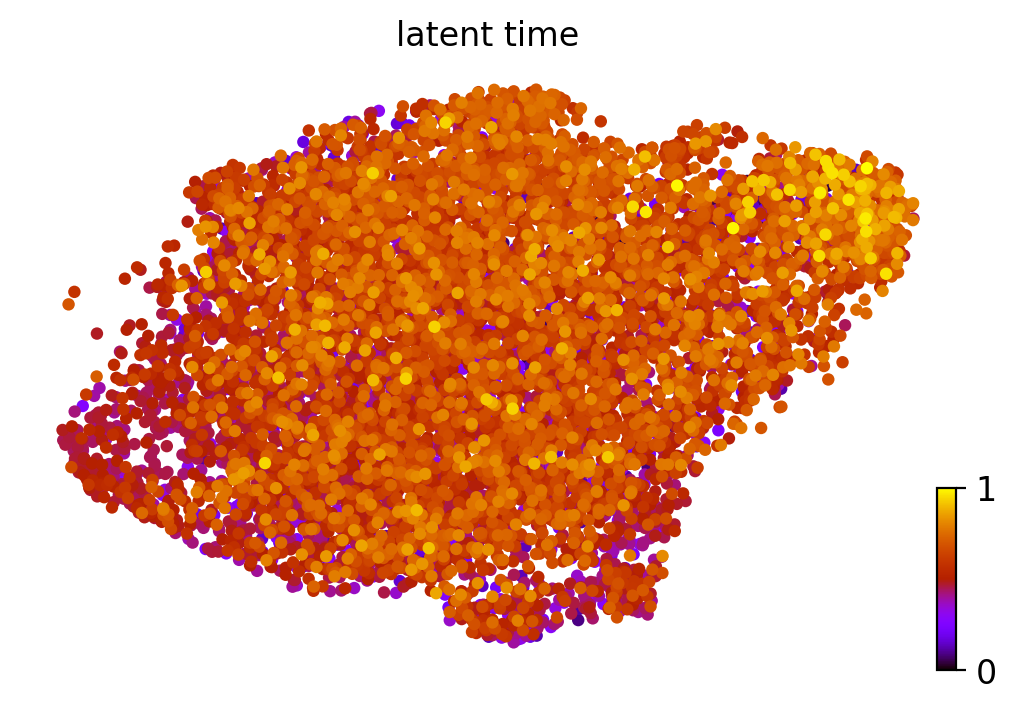

Velocity stream by pseudotime plot saved to: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/11_MultiVelocity_NK3_Full_Reprocessed/05b_All_patient_together/Figures/Velocity_streams_per_pseudotime/Velostream_pseudotime.pdf


In [61]:
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Velocity_streams_per_pseudotime", 
    "Velostream_pseudotime.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=80, save=file_path)

# Confirm the plot has been saved
print(f"Velocity stream by pseudotime plot saved to: {file_path}")

# Examine some example genes

In [473]:
# Find the intersection of GENE_LIST_OF_INTEREST and adata_result.var_names
gene_list = list(set(GENE_LIST_OF_INTEREST).intersection(adata_result.var_names))

## Plot accessibility and expression against gene time

### Heavy code version

In [474]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/Accessibility_Expression_Against_Gene_Time", 
    "Accessibility_Expression_Against_Gene_Time.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

mv.dynamic_plot(adata_result, gene_list, color_by='state', axis_on=False, frame_on=False)

# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')

# Close the figure to free memory
plt.close()


In [475]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/Velocity_Against_Gene_Time", 
    "Velocity_Against_Gene_Time.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
mv.dynamic_plot(adata_result, gene_list, color_by='state', by='velocity', axis_on=False, frame_on=False)
# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')

# Close the figure to free memory
plt.close()


In [476]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/Accessibility_Expression_Against_Shared_Latent_Time", 
    "Accessibility_Expression_Against_Shared_Latent_Time.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
mv.dynamic_plot(adata_result, gene_list, color_by=CELL_TYPE_COLNAME, gene_time=False, axis_on=False, frame_on=False)
# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')

# Close the figure to free memory
plt.close()


In [477]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/unspliced_unspliced", 
    "_unspliced_unspliced.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
# Unspliced-spliced phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by=CELL_TYPE_COLNAME, by='us', axis_on=False, frame_on=False)

# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')
# Close the figure to free memory
plt.close()


In [478]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/Unspliced_spliced", 
    "Unspliced_spliced.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
# Unspliced-spliced phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by='c', by='us', cmap='coolwarm', title_more_info=True, axis_on=False, frame_on=False)

# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')
# Close the figure to free memory
plt.close()

In [479]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/Chromatin_unspliced", 
    "Chromatin_unspliced.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
# Unspliced-spliced phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by=CELL_TYPE_COLNAME, by='cu', axis_on=False, frame_on=False)

# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')
# Close the figure to free memory
plt.close()

In [480]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/3Dphaseportraits", 
    "3Dphaseportraits.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
# Unspliced-spliced phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by=CELL_TYPE_COLNAME, by='cus', axis_on=False, downsample=2)
# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')
# Close the figure to free memory
plt.close()

In [481]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/Arrow1", 
    "Arrow1.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
# Unspliced-spliced phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by=CELL_TYPE_COLNAME, by='us', axis_on=False, frame_on=False, downsample=2, velocity_arrows=True)
# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')
# Close the figure to free memory
plt.close()

In [482]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/Arrow2", 
    "Arrow2.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
# Unspliced-spliced phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by=CELL_TYPE_COLNAME, by='cu', axis_on=False, frame_on=False, downsample=2, velocity_arrows=True)
# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')
# Close the figure to free memory
plt.close()

In [483]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
# Construct the file path for saving the plot
file_path = os.path.join(
    PATH_ANALYSIS_OUTPUT, 
    "Figures/Downstream_Genes_Analysis/Arrow3", 
    "Arrow3.pdf"
)

# Create the directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
# Unspliced-spliced phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by=CELL_TYPE_COLNAME, by='cus', downsample=3, velocity_arrows=True)# Save the current figure to the specified file path
plt.savefig(file_path, format='pdf')
# Close the figure to free memory
plt.close()

### Sparse code Version

In [ ]:
import os
import matplotlib.pyplot as plt

def generate_plots(adata_result, gene_list, PATH_ANALYSIS_OUTPUT, SAMPLE_OF_INTEREST, CELL_TYPE_COLNAME):
    # Define all plot configurations
    plot_configs = [
        {
            "dir_name": "Accessibility_Expression_Against_Gene_Time",
            "plot_type": "dynamic",
            "params": {
                "color_by": "state",
                "axis_on": False,
                "frame_on": False
            }
        },
        {
            "dir_name": "Velocity_Against_Gene_Time",
            "plot_type": "dynamic",
            "params": {
                "color_by": "state",
                "by": "velocity",
                "axis_on": False,
                "frame_on": False
            }
        },
        {
            "dir_name": "Accessibility_Expression_Against_Shared_Latent_Time",
            "plot_type": "dynamic",
            "params": {
                "color_by": CELL_TYPE_COLNAME,
                "gene_time": False,
                "axis_on": False,
                "frame_on": False
            }
        },
        {
            "dir_name": "unspliced_unspliced",
            "plot_type": "scatter",
            "params": {
                "color_by": CELL_TYPE_COLNAME,
                "by": "us",
                "axis_on": False,
                "frame_on": False
            }
        },
        {
            "dir_name": "Unspliced_spliced",
            "plot_type": "scatter",
            "params": {
                "color_by": "c",
                "by": "us",
                "cmap": "coolwarm",
                "title_more_info": True,
                "axis_on": False,
                "frame_on": False
            }
        },
        {
            "dir_name": "Chromatin_unspliced",
            "plot_type": "scatter",
            "params": {
                "color_by": CELL_TYPE_COLNAME,
                "by": "cu",
                "axis_on": False,
                "frame_on": False
            }
        },
        {
            "dir_name": "3Dphaseportraits",
            "plot_type": "scatter",
            "params": {
                "color_by": CELL_TYPE_COLNAME,
                "by": "cus",
                "axis_on": False,
                "downsample": 2
            }
        },
        {
            "dir_name": "Arrow1",
            "plot_type": "scatter",
            "params": {
                "color_by": CELL_TYPE_COLNAME,
                "by": "us",
                "axis_on": False,
                "frame_on": False,
                "downsample": 2,
                "velocity_arrows": True
            }
        },
        {
            "dir_name": "Arrow2",
            "plot_type": "scatter",
            "params": {
                "color_by": CELL_TYPE_COLNAME,
                "by": "cu",
                "axis_on": False,
                "frame_on": False,
                "downsample": 2,
                "velocity_arrows": True
            }
        },
        {
            "dir_name": "Arrow3",
            "plot_type": "scatter",
            "params": {
                "color_by": CELL_TYPE_COLNAME,
                "by": "cus",
                "downsample": 3,
                "velocity_arrows": True
            }
        }
    ]

    # Generate each plot
    for config in plot_configs:
        # Construct file path
        file_path = os.path.join(
            PATH_ANALYSIS_OUTPUT,
            "Figures/Downstream_Genes_Analysis",
            config["dir_name"],
            f"{SAMPLE_OF_INTEREST}_{config['dir_name']}.pdf"
        )

        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(file_path), exist_ok=True)

        # Generate plot based on type
        if config["plot_type"] == "dynamic":
            mv.dynamic_plot(adata_result, gene_list, **config["params"])
        else:  # scatter plot
            mv.scatter_plot(adata_result, gene_list, **config["params"])

        # Save and close figure
        plt.savefig(file_path, format='pdf')
        plt.close()

In [ ]:
generate_plots(
    adata_result,
    gene_list,
    PATH_ANALYSIS_OUTPUT,
    SAMPLE_OF_INTEREST,
    CELL_TYPE_COLNAME
)